In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization  
$
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\P}{\mathbb{P}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
$

$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
$

$\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$

$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$



sum, product
$
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet bold,
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\At}{\Ab^T}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wt}{\wb^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math bold
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\lambda_i}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$

$
\newcommand{\zerob}{\pmb{0}}
$


aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$

$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

# Parameters
* positive shape parameter - $k$
* positive rate parameter - $\lambda$; sometimes, $\mu = 1/\lambda$, called scale parameter is used.
* $k = 1 ~ \rightarrow$ Exponential distribution
* Special case of Gamma distribution when $k \in \mathbb{R}$ and using the Gamma function instead of the factorial in the denominator
* Distribution of sum of $k$ independent exponential variables with mean $\mu$
* The number of telephone calls made at the same time to the operators of switching stations

# pdf
$f(x; k,\lambda)={\lambda^k x^{k-1} e^{-\lambda x} \over (k-1)!}\quad\mbox{for }x, \lambda \geq 0,$  
* k - shape parameter
* $\lambda$ - rate parameter
* When $\mu = 2$, it simplifies to chi-squared distribution with $2k$ degrees of freedom 

# cdf  

$F(x; k,\lambda) = 1 - \sum_{n=0}^{k-1}\frac{1}{n!}e^{-\lambda x}(\lambda x)^n.$

# Statistics

* Mean: $k / \lambda$
* Variance: $k / \lambda^2$
* Mode: $\frac{1}{\lambda} (k-1)$ for $k \gt 1$

# Occurrence 

* Events that occur independently with some average rate are modeled with a [Poisson process](http://www.wikiwand.com/en/Poisson_process) 
* The waiting times between $k$ occurrences of the event are Erlang distributed
* FYI, the number of events in a given amount of time is described by a Poisson distribution

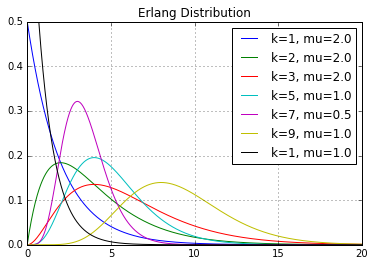

<function __main__.interact_erlang>

In [3]:
def compute_erlang(x, k, mu):
    l = 1./mu
    num = (l**k) * (x**(k-1)) * (math.exp(-l*x))
    den = math.factorial(k-1)
    return 1.*num/den

def show_erlang(k, mu):
    x = np.linspace(0, 20, 1000)
    y = [compute_erlang(xx, k, mu) for xx in x]
    plt.plot(x, y, label='k={0}, mu={1}'.format(k,mu))
    plt.title('Erlang Distribution')
    plt.grid()
    
def show_all_erlang():
    params = [[1,2.],[2,2.],[3,2.],[5,1.],[7,.5],[9,1.],[1,1.]]
    for param in params:
        show_erlang(param[0], param[1])
    plt.ylim(0,0.5)
    plt.legend()
    
def interact_erlang(k, mu, show_all=True):
    if show_all:
        show_all_erlang()
    else:
        show_erlang(k, mu)
    plt.show()
    
interact(interact_erlang, k=(1,10), mu=(1,5,0.5))
